# condiction ediges in langgraph

In [5]:
!pip install --quiet -U langgraph


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Define a starting node. This node just returns a predefined string.
def result_check(str):
  return "Hi! Well.. I have no idea... but i will give you the result...... "

In [11]:
# condiction ediges in langgraph her i am set for three condiction 

def super_student(str):
    return str +" was your good in all subject"
def pass_student(str):
    return str + " was your ok in all subject"
def fail_student(str):
    return str +" was your bad in all subject"

In [8]:
import random
from typing import Literal


#condction here
def get_result(str)-> Literal["super","pass","fail"]:
    sample_value = random.random()
    if sample_value > 0.8:
        return "super"
    elif sample_value > 0.5:
        return "pass"
    else:
        return "fail"
    


In [13]:
#create the workflow for the graph ysing the langchan


from langgraph.graph import Graph, START, END


# Create a new Graph
workflow = Graph()


#add the what are the nodel are there

workflow.add_node("result_check",result_check)
workflow.add_node("super",super_student)
workflow.add_node("pass",pass_student)
workflow.add_node("fail",fail_student)


#add the ediges with condiction

workflow.add_edge(START,"result_check")

workflow.add_conditional_edges("result_check",get_result)
workflow.add_edge("super",END)
workflow.add_edge("pass",END)
workflow.add_edge("fail",END)


#Compile the graph
app = workflow.compile()

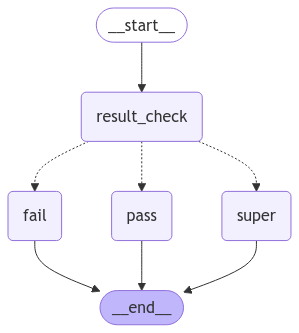

In [16]:
# Visualize your graph
from IPython.display import Image, display
png = app.get_graph().draw_mermaid_png()
display(Image(png))

In [33]:
app.invoke("How much is 2+2")

'Hi! Well.. I have no idea... but i will give you the result......  was your ok in all subject'